In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [343]:
df = pd.DataFrame([[.5,.25,100,'red'],
                   [.4,.01,101,'red'],
                   [.5,.45,102,'green'],
                   [.2,.03,103,'blue']],columns=['x1','x2','id','color'])
print(df)

    x1    x2   id  color
0  0.5  0.25  100    red
1  0.4  0.01  101    red
2  0.5  0.45  102  green
3  0.2  0.03  103   blue


In [346]:
df_color = pd.get_dummies(df.color,prefix='color')
print(df_color)

   color_blue  color_green  color_red
0           0            0          1
1           0            0          1
2           0            1          0
3           1            0          0


In [348]:
print(df.join(df_color))

    x1    x2   id  color  color_blue  color_green  color_red
0  0.5  0.25  100    red           0            0          1
1  0.4  0.01  101    red           0            0          1
2  0.5  0.45  102  green           0            1          0
3  0.2  0.03  103   blue           1            0          0


In [349]:
df2 = pd.DataFrame([[101,'yes'],[102,'no'],[110,'no']],columns=['id','comment'])
print(df2)

    id comment
0  101     yes
1  102      no
2  110      no


In [350]:
print(pd.merge(left=df,right=df2,on='id')) # how='inner'

    x1    x2   id  color comment
0  0.4  0.01  101    red     yes
1  0.5  0.45  102  green      no


In [351]:
print(pd.merge(left=df,right=df2,on='id',how='left'))

    x1    x2   id  color comment
0  0.5  0.25  100    red     NaN
1  0.4  0.01  101    red     yes
2  0.5  0.45  102  green      no
3  0.2  0.03  103   blue     NaN


In [353]:
print(pd.merge(left=df,right=df2,on='id',how='right'))

    x1    x2   id  color comment
0  0.4  0.01  101    red     yes
1  0.5  0.45  102  green      no
2  NaN   NaN  110    NaN      no


In [352]:
print(pd.merge(left=df,right=df2,on='id',how='outer'))

    x1    x2   id  color comment
0  0.5  0.25  100    red     NaN
1  0.4  0.01  101    red     yes
2  0.5  0.45  102  green      no
3  0.2  0.03  103   blue     NaN
4  NaN   NaN  110    NaN      no


In [113]:
df = pd.DataFrame(np.random.multivariate_normal([5,10],[[10,2],[2,1]], 500),columns=['x1','x2'])

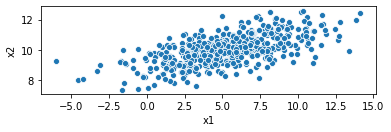

In [114]:
sns.scatterplot(x='x1',y='x2',data=df)
plt.gca().set_aspect('equal');

In [119]:
# stock price returns for Chevron (CVX) and Exxon-Mobil (XOM)
df = pd.read_csv('../data/sp500_px.csv', index_col=0)
df = df[['CVX','XOM']]

In [120]:
print(df.tail())

                 CVX       XOM
2015-06-25 -1.110001 -0.919998
2015-06-26  0.360000  0.029999
2015-06-29 -0.809998 -0.230003
2015-06-30 -0.979996 -0.540001
2015-07-01 -0.210007 -0.909996


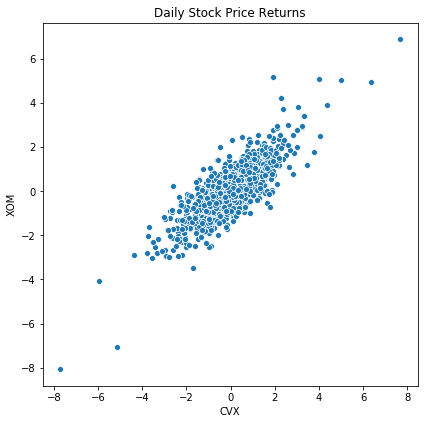

In [132]:
# plot XOM against CVS
# can we choose either dimension over the other based on variance?
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x='CVX',y='XOM',data=df)
plt.title('Daily Stock Price Returns');
plt.gca().set_aspect('equal');
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/cvx_xom.png')

In [122]:
# function to plot a vector
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(width=3,
                    headwidth=12,
                    shrink=0,
                    color='k'
                    #arrowstyle='->',
                    #linewidth=6,
                    #shrinkA=0,shrinkB=0
                   )
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data, pca vectors and pca planes
def plot_pca(df,pca,num_components=1,colors=['r','g'],fig=None):
    fig = fig or plt.figure(figsize=(14,6))
    plt.subplot2grid((2,2), (0, 0), rowspan=2)
    sns.scatterplot(x=df.columns[0],y=df.columns[1],data=df);
    plt.scatter(2,4,c='k',linewidths=5)

    for i in range(num_components):
        length = pca.explained_variance_[i]
        vector = pca.components_[i]
        slope0 = vector[1] / vector[0]
        _= plt.plot([-7,7],[slope0*-7,slope0*7],color=colors[i])
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_,pca.mean_ + v)
    plt.gca().set_aspect('equal')
    #plt.axis([-8.5, 8.5, -8.5, 8.5])
    X = pca.transform(df)
    for i in range(num_components):
        plt.subplot2grid((2,2), (i, 1))
        plt.plot([-8,8],[0,0],colors[i])
        sns.scatterplot(X[:,i],[0]*len(X));
        plt.scatter(pca.transform([[2,4]])[0][i],0,color='k',linewidths=5)
        plt.axis([-8.5, 8.5, -1, 1]);
        plt.xlabel('component '+str(i))

In [123]:
from sklearn.decomposition import PCA

# extract the first 2 principle compenents
pca = PCA(n_components=2).fit(df)

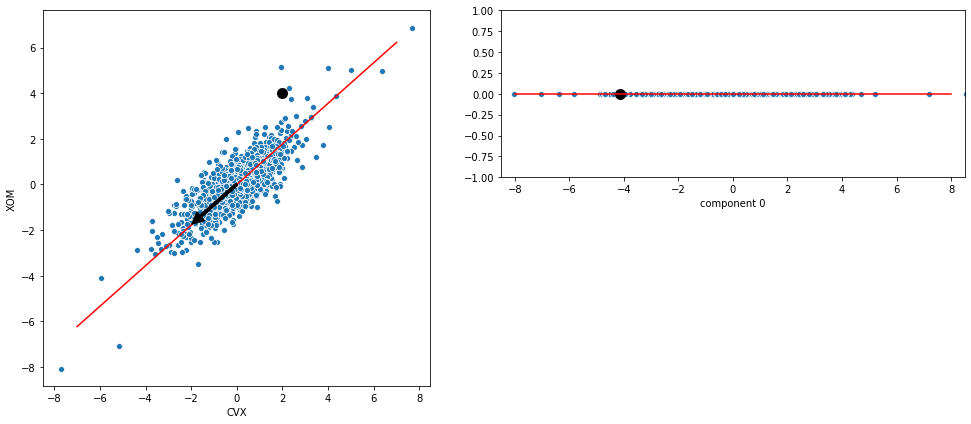

In [133]:
# plot dataset, and first principle component
plot_pca(df,pca,num_components=1)
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/pca_first.png')

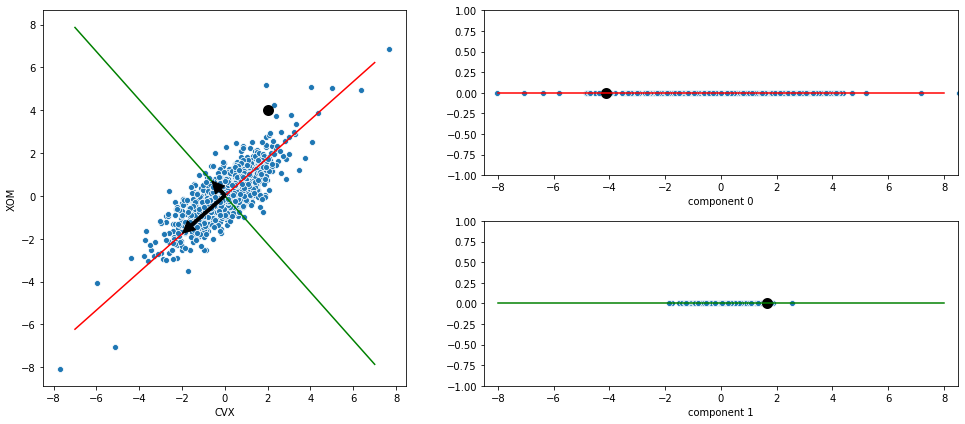

In [134]:
# plot dataset, and both components
plot_pca(df,pca,num_components=2)
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/pca_second.png')

In [126]:
# what does the data look like in the transformed space?
X = pca.transform(df)

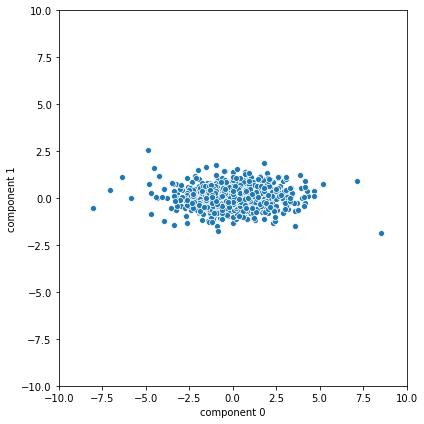

In [153]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
sns.scatterplot(X[:,0],X[:,1]);
plt.xlabel('component 0');plt.ylabel('component 1');
ax.set_xlim(-10,10);ax.set_ylim(-10,10);
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/pca_transformed.png')

In [136]:
# how much of the variance is explained by each component
pca.explained_variance_ratio_

array([0.89585804, 0.10414196])

In [137]:
# what does the first component (vector) look like?
pca.components_[0]

array([-0.74710069, -0.66471089])

In [138]:
# and the second
pca.components_[1]

array([-0.66471089,  0.74710069])

In [139]:
# what if we add a third dimension
# stock price returns for Chevron (CVX), Exxon-Mobil (XOM) and Apple (AAPL)
df_3 = pd.read_csv('../data/sp500_px.csv')
df_3 = df_3[['CVX','XOM','IBM']]

In [140]:
df_3

,CVX,XOM,IBM
0,0.072921,-0.016991,0.092165
1,0.102089,0.016991,0.115207
2,0.029168,0.084954,-0.023041
3,0.058337,0.067964,-0.253454
4,0.044272,0.034378,0.069862
...,...,...,...
5642,-1.110001,-0.919998,-1.720001
5643,0.360000,0.029999,-0.769989
5644,-0.809998,-0.230003,-0.949997
5645,-0.979996,-0.540001,-1.330001


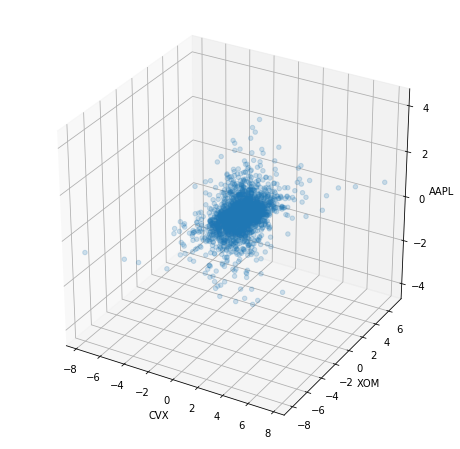

In [15]:
#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(1,1,1, projection='3d');
ax.scatter3D(df_3['CVX'],df_3['XOM'],df_3['AAPL'], alpha=.2);
ax.set(xlabel='CVX',ylabel='XOM',zlabel='AAPL');

In [32]:
# need to install:
#  conda install -n eods-f19 plotly nbformat
import plotly.express as px

fig = px.scatter_3d(x=df_3['CVX'],y=df_3['XOM'],z=df_3['IBM'], opacity=0.7)
fig.show()

In [17]:
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
df_bc = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_bc.shape

(569, 30)

In [18]:
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


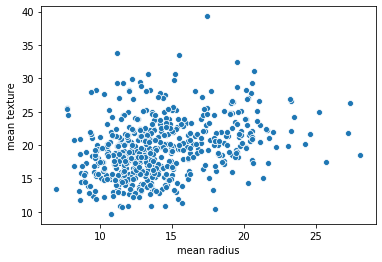

In [19]:
sns.scatterplot(df_bc.iloc[:,0],df_bc.iloc[:,1]);

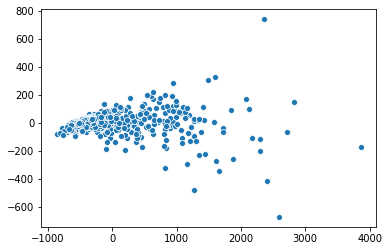

In [20]:
X = PCA(n_components=2).fit_transform(df_bc)

sns.scatterplot(X[:,0],X[:,1]);

In [21]:
diabetes = datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_diabetes.shape

(442, 10)

In [22]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


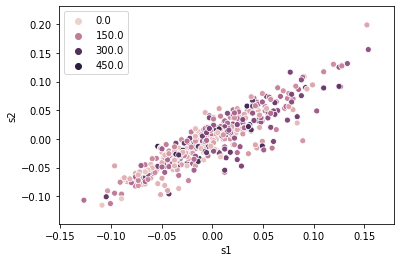

In [23]:
sns.scatterplot(x='s1',y='s2',hue=diabetes.target,data=df_diabetes);

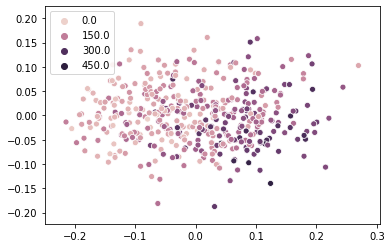

In [24]:
X = PCA(n_components=2).fit_transform(df_diabetes)
sns.scatterplot(X[:,0],X[:,1],hue=diabetes.target)

In [25]:
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

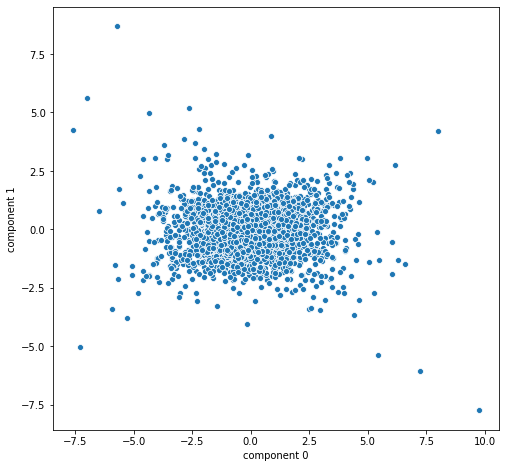

In [35]:
X = PCA(n_components=2).fit_transform(df_3)

fig = plt.figure(figsize=(8,8))
_= sns.scatterplot(X[:,0],X[:,1])
_ = plt.xlabel('component 0')
_ = plt.ylabel('component 1')
_ = plt.gca().set_aspect('equal')

In [37]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)

In [38]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


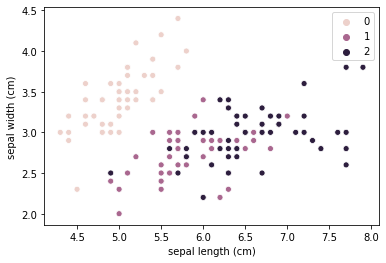

In [40]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue=iris.target,data=df_iris)

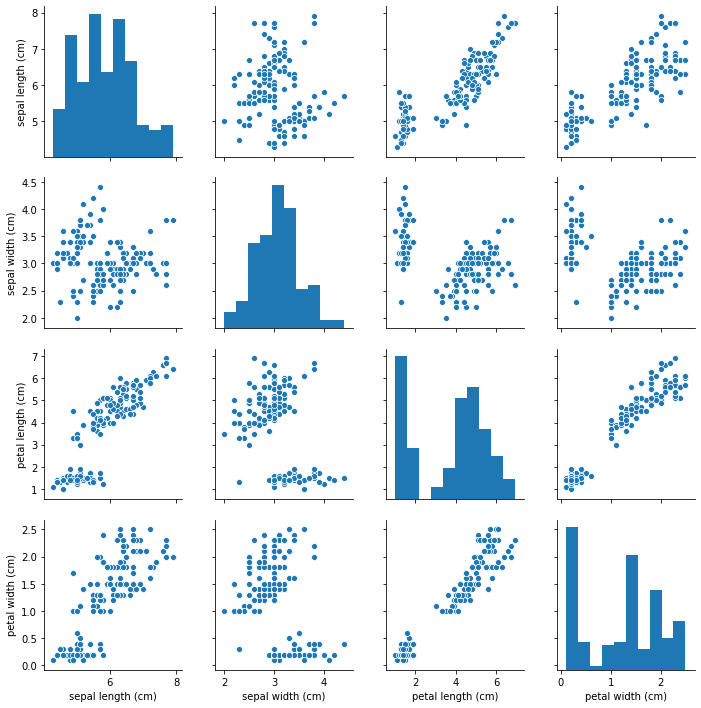

In [47]:
sns.pairplot(df_iris)

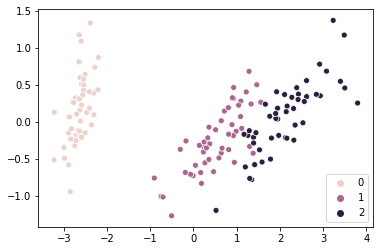

In [42]:
X_iris = PCA(n_components=2).fit_transform(df_iris)
sns.scatterplot(x=X_iris[:,0],y=X_iris[:,1],hue=iris.target)

---

In [156]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA


In [242]:
# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

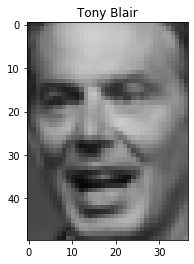

In [196]:
plt.imshow(lfw_people.images[1], cmap=plt.cm.gray,vmin=0, vmax=255)
plt.title(lfw_people.target_names[lfw_people.target[1]], size=12);
#plt.xticks(());plt.yticks(());
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/tony_blair.png')

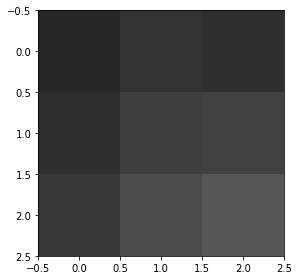

In [200]:
plt.imshow(lfw_people.images[1][:3,:3],cmap=plt.cm.gray,vmin=0, vmax=255);
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/pixel_example.png')

In [198]:
lfw_people.images[1][:3,:3]

array([[39.666668, 50.333332, 47.      ],
       [47.666668, 63.      , 65.333336],
       [55.333332, 76.666664, 86.333336]], dtype=float32)

In [230]:
lfw_people.images[1].shape

(50, 37)

In [235]:
x = lfw_people.images[1].reshape(1,-1)
x

array([[ 39.666668,  50.333332,  47.      , ..., 117.666664, 115.      ,
        133.66667 ]], dtype=float32)

In [236]:
x.shape

(1, 1850)

In [229]:
# get the shape of images for plotting the
n_samples, h, w = lfw_people.images.shape

# use actual pixel values, ignoring relative position
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"image_size: {h}x{w}")
print("n_features: %d" % n_features)
print("n_classes : %d" % n_classes)
print(f"n_train   : {len(X_train)}")
print(f"n_test    : {len(X_test)}")

image_size: 50x37
n_features: 1850
n_classes : 7
n_train   : 966
n_test    : 322


In [209]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [222]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 966 faces
done in 0.150s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.010s


In [ ]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

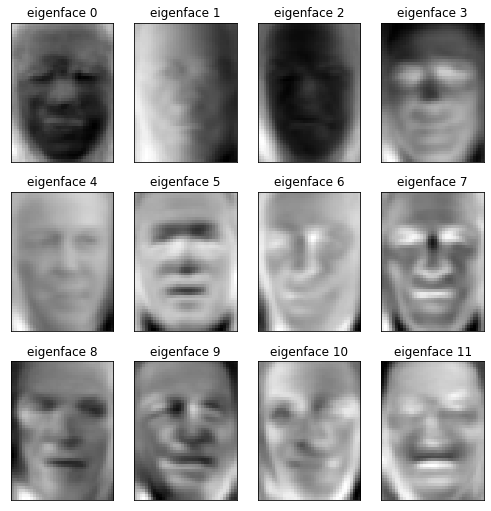

In [227]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/eigenfaces.png')

In [239]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

t0 = time()
params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_pca = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                       params, cv=5, iid=False)
clf_pca = clf_pca.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print(f"best_params : {clf_pca.best_params_}")
print(f"best_score  : {clf_pca.best_score_:0.2f}")

done in 44.210s
best_params : {'C': 1000.0, 'gamma': 0.005}
best_score  : 0.81


In [241]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = clf_pca.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.46      0.57        13
     Colin Powell       0.81      0.87      0.84        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.82      0.98      0.89       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       1.00      0.78      0.88        36

         accuracy                           0.85       322
        macro avg       0.89      0.72      0.78       322
     weighted avg       0.86      0.85      0.84       322

[[  6   2   0   5   0   0   0]
 [  1  52   0   7   0   0   0]
 [  0   2  17   8   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   4  20   0   0]
 [  0   3   0   3   1   8   0]
 [  1   1   2   4   0   0  28]]


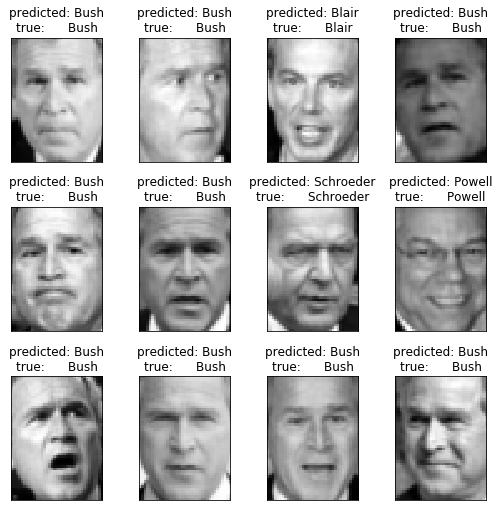

In [244]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/face_predictions.png')

In [213]:
t0 = time()
params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   params, cv=5, iid=False)
clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print(clf.best_params_)
print(clf.best_score_)

done in 28.676s
{'C': 1000.0, 'gamma': 0.005}
0.8148301835082151


In [216]:
from sklearn.linear_model import LogisticRegression

In [221]:
params={'penalty':['l1','l2']}
clf_lr = GridSearchCV(LogisticRegression(solver='saga',multi_class='auto'),
                   params, cv=5, iid=False)
clf_lr.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print(clf_lr.best_params_)
print(clf_lr.best_score_)

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/l

done in 1179.513s
{'penalty': 'l1'}
0.8208165934084878


/home/bgibson/anaconda3/envs/eods-f19/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [214]:
t0 = time()
params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   params, cv=5, iid=False)
clf.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
print(clf.best_params_)
print(clf.best_score_)

done in 401.491s
{'C': 1000.0, 'gamma': 0.0001}
0.3975503417066367


---

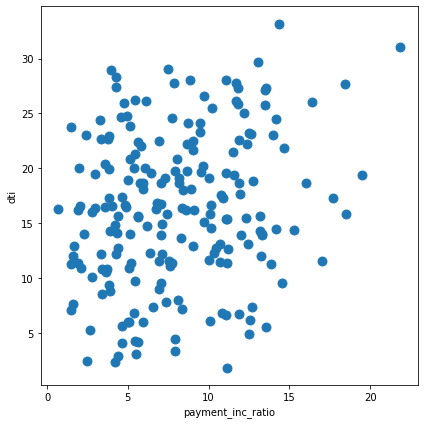

In [248]:
# loading and plotting the data
X = pd.read_csv('../data/loan200.csv')[['payment_inc_ratio','dti']].values
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],s=80);plt.xlabel('payment_inc_ratio');plt.ylabel('dti');
plt.tight_layout();
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/loan_2D.png')

In [249]:
from sklearn.cluster import KMeans

In [259]:
km = KMeans(n_clusters=4,init='random') # initilize to find 4 clusters

In [260]:
c = km.fit_predict(X)     # fit and return cluster assignments

In [261]:
c[:10]

array([2, 3, 0, 0, 0, 0, 3, 1, 2, 2], dtype=int32)

In [290]:
# function to plot clusters
def plot_clusters(X,c,km=None):
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    for i in range(np.max(c) + 1):
        cluster = X[c == i]
        ax.scatter(cluster[:,0],cluster[:,1],s=80,label=i,cmap='Set2');
    ax.legend();
    ax.set_xlabel('payment_inc_ratio');ax.set_ylabel('dti');
    if km:
        for m in km.cluster_centers_: # plot cluster centers
            ax.plot(m[0],m[1], marker='x',c='k', ms=20, mew=5)

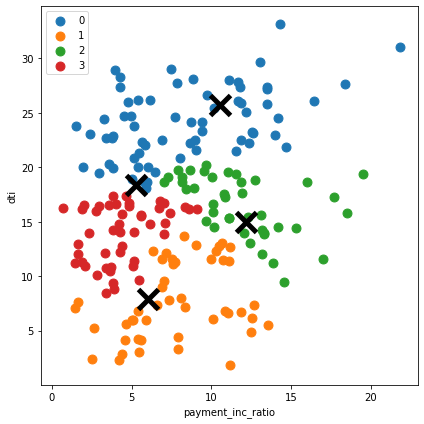

In [293]:
plot_clusters(X,c, km)            # plot clusters
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/loan_clusters_kmeans.png')

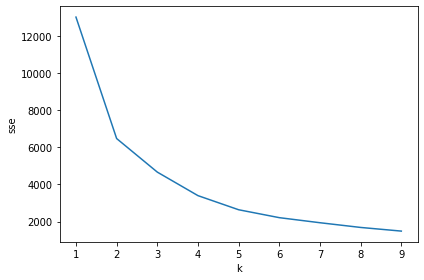

In [274]:
sse = []
for i in range(1,10):
    sse.append(KMeans(n_clusters=i).fit(X).inertia_)

plt.plot(range(1,10),sse); plt.xlabel('k'); plt.ylabel('sse');
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/kmeans_sse.png')

In [275]:
# nice helper function for creating a dendrogram
from scipy.cluster import hierarchy

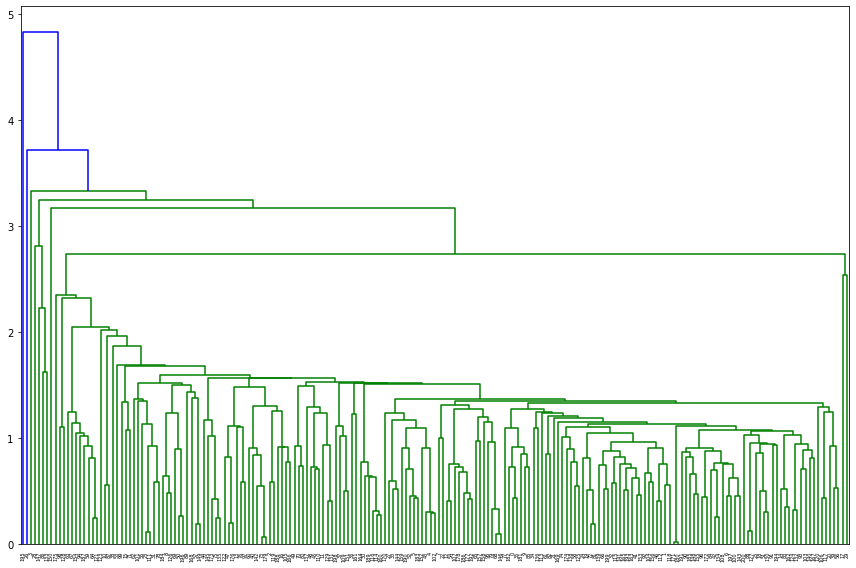

In [277]:
Z = hierarchy.linkage(X,'single')

fig = plt.figure(figsize=(12,8))
hierarchy.dendrogram(Z);
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/hac_single.png')

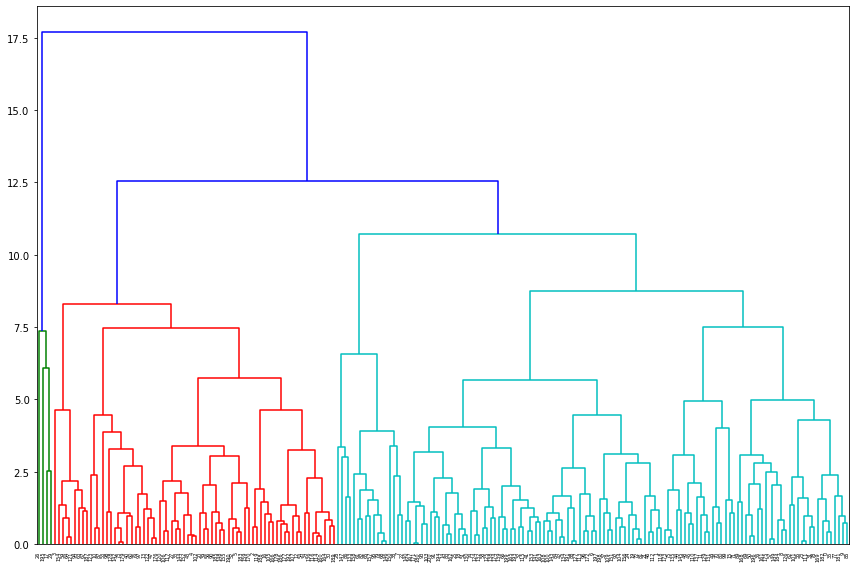

In [278]:
Z = hierarchy.linkage(X,'average')

fig = plt.figure(figsize=(12,8))
hierarchy.dendrogram(Z);
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/hac_average.png')

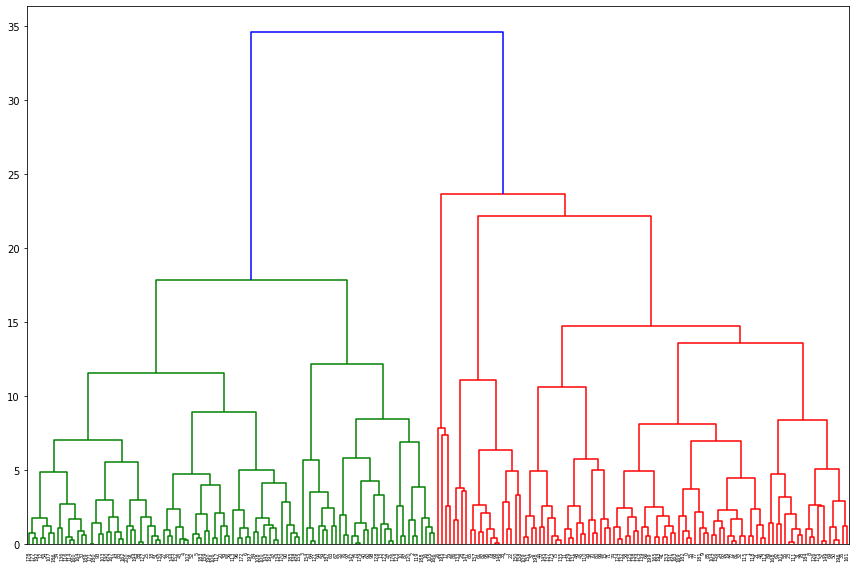

In [279]:
Z = hierarchy.linkage(X,'complete')

fig = plt.figure(figsize=(12,8))
hierarchy.dendrogram(Z);
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/hac_complete.png')

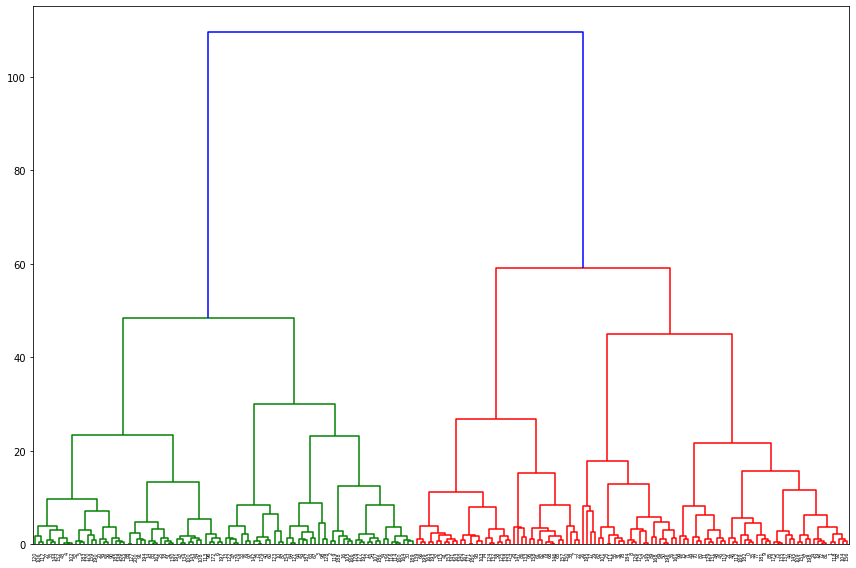

In [280]:
Z = hierarchy.linkage(X,'ward')

fig = plt.figure(figsize=(12,8))
hierarchy.dendrogram(Z);
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/hac_ward.png')

In [283]:
from sklearn.cluster import AgglomerativeClustering

In [299]:
hac = AgglomerativeClustering(linkage='single',
                              affinity='euclidean',
                              n_clusters=4)

In [300]:
c = hac.fit_predict(X) # fit and assign loan data

In [301]:
c[:10]

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0])

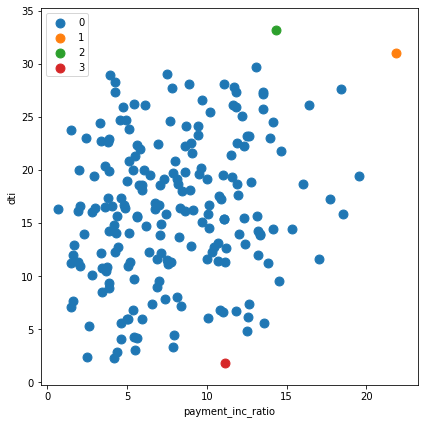

In [307]:
c = AgglomerativeClustering(linkage='single', affinity='euclidean', n_clusters=4).fit_predict(X)
plot_clusters(X,c,None) 
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/loan_clusters_hacsingle.png')

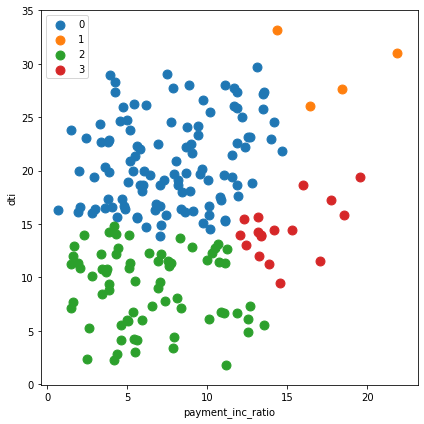

In [308]:
c = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=4).fit_predict(X)
plot_clusters(X,c,None) 
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/loan_clusters_hacaverage.png')

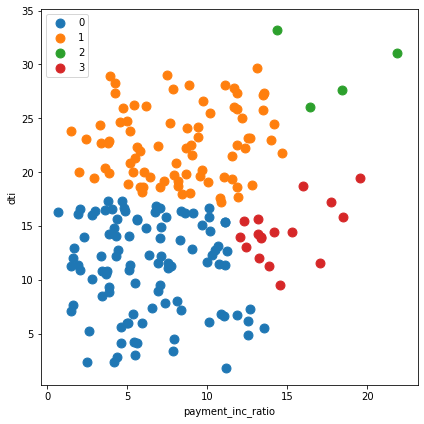

In [309]:
c = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=4).fit_predict(X)
plot_clusters(X,c,None) 
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/loan_clusters_haccomplete.png')

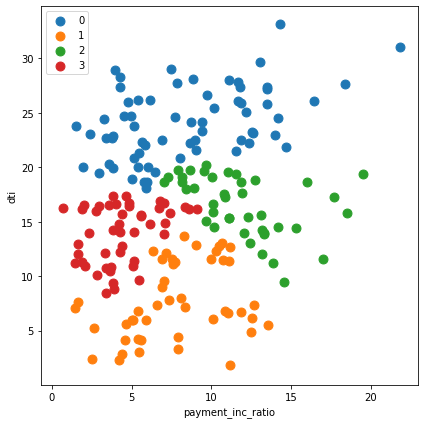

In [310]:
c = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=4).fit_predict(X)
plot_clusters(X,c,None) 
plt.tight_layout()
plt.savefig('../slides/eods-09-dimensionalityreduction-imagerecognition-clustering/images/loan_clusters_hacward.png')